# Part I - Theory

### 1. Briefly describe the random variable. Report its probability density function, expectation and variance.

$\mu$ is a random variable describing the expected number of times that the task has to be performed. It follows a gamma distribution with parameters $\alpha$: shape, and $\beta$: rate

Its Probability density function (pdf) is: 
$$f(x) = \frac{\beta^{\alpha-1}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}$$

with
$$ \Gamma(\alpha) = \int_{0}^{\infty} t^{\alpha-1} e^{-t} dt $$

Its expected value and variance are:
$$E[\mu]=\frac{\alpha}{\beta}$$
$$Var(\mu)=\frac{\alpha}{\beta^2}$$



### 2. Derive the expectation and variance of the times a task has to be performed on a random day, that are $E[X]$ and $Var(X) respectively. Justify rigorously all the steps of your derivation.

To find $E[X]$ we can start by applying the tower rule:
$$ E[X]=E[E[X|\mu]] $$
Since $X|\mu$ follows a Poisson distribution with parameter $\mu$, we know its expected value and variance:
$$ E[X|\mu]=\mu $$   
$$ Var(X|\mu)=\mu $$
Therefore:
$$E[X]=E[\mu]=\frac{\alpha}{\beta}$$

To find $Var(X)$ we use the law of total variance, that states that:
$$ Var(X) = Var(E[X|\mu]) + E[Var(X|\mu)] $$
Using previously showed equations:
$$ Var(X) = Var(\mu) + E[\mu] = \frac{\alpha}{\beta^2} + \frac{\alpha}{\beta} $$


### 3. Derive the expectation and variance of the time needed to process the task ones on a random day, that are $E[T]$ and $Var(T)$ respectively. Justify rigorously all the steps of your derivation.

To find $E[T]$ we can start by applying the tower rule:
$$ E[T]=E[E[T|\tau]] $$
Since $T|\tau$ follows a Exponential distribution with parameter $1/\tau$, we know its expected value and variance:
$$ E[T|\tau]= \tau$$   
$$ Var(T|\tau)= \tau^2 $$
Therefore:
$$ E[T]=E[\tau]=0.3*\tau_1 + 0.5*\tau_2 + 0.2*\tau_3$$

To find $Var(T)$ we use the law of total variance, that states that:
$$ Var(T) = Var(E[T|\tau]) + E[Var(T|\tau)] $$
Using previously showed equations:
$$ Var(T) = Var(\tau) + E[\tau^2] $$
By definition of variance:
$$ Var(\tau) = E[\tau^2] - E[\tau]^2 $$
Therefore:
$$ Var(T) = 2E[\tau^2] - E[\tau]^2 = 2(0.3*\tau_1^2 + 0.5*\tau_2^2 + 0.2*\tau_3^2) - (0.3*\tau_1 + 0.5*\tau_2 + 0.2*\tau_3)^2 $$


### 4. Derive the expectation of the time taken by the unit to process all tasks of a single day, i.e. $E[TX]$. Justify rigorously all the steps of your derivation.

Since X and T are independent:
$$ E[TX] = E[T]E[X] = (0.3*\tau_1 + 0.5*\tau_2 + 0.2*\tau_3)\frac{\alpha}{\beta}

### 5. Use the law of total variance to show that: $$Var(TX) = E^2[X]Var(T) + E^2[T]Var(X) + Var(X)Var(T) $$

By the law of total variance:
$$Var(TX) = Var(E[TX|X]) + E[Var(TX|X)] $$
$$= Var(XE[T]) + E[X^2Var(T)] $$
$$= E^2[T]Var(X) + E[X^2]Var(T) $$
$$= E^2[T]Var(X) + Var(T)(Var(X) + E^2[X]) $$
$$= E^2[T]Var(X) + E^2[X]Var(T) + Var(X)Var(T)

### 6. Derive the variance of the time taken by the unit to process all tasks of a single day, i.e. $Var(TX)$. Justify rigorously all the steps of your derivation.

Using the formula just proven, we can substitute all the parameters and we get:
$$ Var(TX) = (0.3*\tau_1 + 0.5*\tau_2 + 0.2*\tau_3)^2( \frac{\alpha}{\beta^2} + \frac{\alpha}{\beta}) 
+ (\frac{\alpha}{\beta})^2(2(0.3*\tau_1^2 + 0.5*\tau_2^2 + 0.2*\tau_3^2) - (0.3*\tau_1 + 0.5*\tau_2 + 0.2*\tau_3)^2)
+(\frac{\alpha}{\beta^2} + \frac{\alpha}{\beta})(2(0.3*\tau_1^2 + 0.5*\tau_2^2 + 0.2*\tau_3^2) - (0.3*\tau_1 + 0.5*\tau_2 + 0.2*\tau_3)^2 )

# Part II - Computation

In [1]:
#make all the necessary imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#initialize the parameters
alpha = 10
beta = 1
t1 = 10
t2 = 20
t3 = 30
t  = np.array([t1, t2, t3])
t_probabilities = np.array([0.3, 0.5, 0.2])

### 1. Calculate expectation and variance of the three random variables.

In [3]:
Exp_X = alpha/beta
Var_X = alpha/beta**2 + alpha/beta

Exp_T = np.dot(t,np.transpose(t_probabilities))
Exp_tau_squared = np.dot(t**2,np.transpose(t_probabilities))
Var_T= 2*Exp_tau_squared-Exp_T**2

Exp_XT = Exp_T*Exp_X
Var_XT = Exp_T**2*Var_X + Exp_X**2*Var_T + Var_X*Var_T

In [4]:
print('E[X] = ', Exp_X)
print('Var[X] = ', Var_X)
print('\nE[T] = ', Exp_T, 'minutes')
print('Var[T] = ', Var_T)
print('\nE[XT] =', Exp_XT, 'minutes, or equivalently ', round(Exp_XT/60, 2), ' hours')
print('Var[XT] = ', Var_XT)

E[X] =  10.0
Var[X] =  20.0

E[T] =  19.0 minutes
Var[T] =  459.0

E[XT] = 190.0 minutes, or equivalently  3.17  hours
Var[XT] =  62300.0


### 2. Produce three plots to visualise the (approximated) distribution of the three random variables.

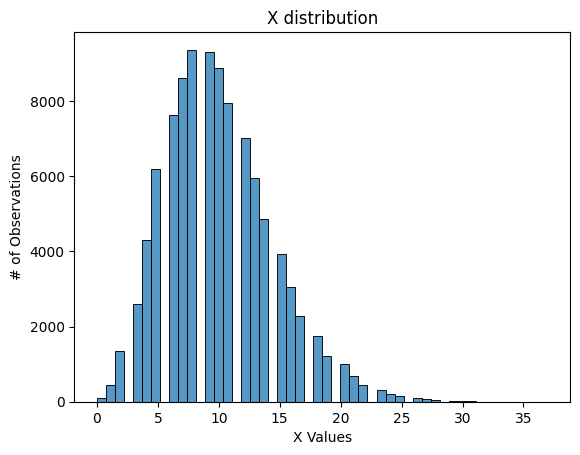

In [5]:
N = 100000
sample_mu = np.random.gamma(shape=alpha, scale=1/beta, size=N)
sample_X = [np.random.poisson(mu) for mu in sample_mu]

sns.histplot(data=sample_X, bins=50)
plt.title('X distribution')
plt.xlabel('X Values')
plt.ylabel('# of Observations')
plt.show()

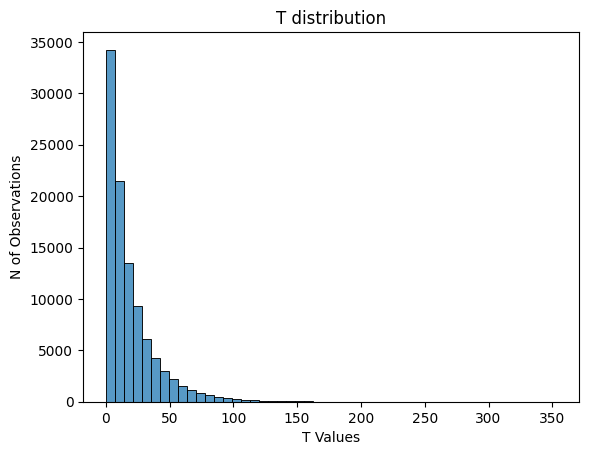

In [6]:
sample_tau = np.random.choice(t, size = N, p = t_probabilities)
sample_T = [np.random.exponential(tau) for tau in sample_tau]

sns.histplot(data=sample_T, bins=50)
plt.title('T distribution')
plt.xlabel('T Values')
plt.ylabel('N of Observations')
plt.show()

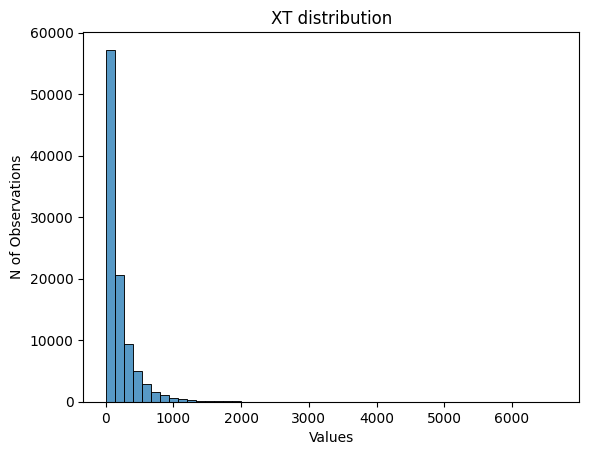

In [7]:
sample_XT = np.array([X*T for X,T in zip(sample_X,sample_T)])

sns.histplot(data=sample_XT, bins=50)
plt.title('XT distribution')
plt.xlabel('Values')
plt.ylabel('N of Observations')
plt.show()

### 3. Estimate the probability that the time taken by the unit to process all tasks of a single day is above 5 hours

In [8]:
sample_XT_5h = sample_XT[sample_XT>5*60]
print("The probability that the time spent is greater than 5 is approximately",len(sample_XT_5h)/len(sample_XT))

The probability that the time spent is greater than 5 is approximately 0.19119


### 4. Estimate three intervals such that the time taken by the unit to process all tasks of a single day is in the interval is 0.90, 0.95, 0.99

In [9]:
print('The probability of XT assuming a value between 0 and ', round(np.quantile(sample_XT, 0.90), 2), ' is approximately 90%')
print('The probability of XT assuming a value between 0 and ', round(np.quantile(sample_XT, 0.95), 2), ' is approximately 95%')
print('The probability of XT assuming a value between 0 and ', round(np.quantile(sample_XT, 0.99), 2), ' is approximately 99%')

The probability of XT assuming a value between 0 and  460.86  is approximately 90%
The probability of XT assuming a value between 0 and  653.64  is approximately 95%
The probability of XT assuming a value between 0 and  1192.12  is approximately 99%


### 5. Estimate the expectation and variance of the cost to run the unit on a random day.

In [10]:
#Function to compute the price paid to run the unit on a random day

def price_per_day(time_minutes):
    time_hours = (time_minutes+(60-time_minutes%60))/60
    price = time_hours*100 + (time_hours-1)*30/2*time_hours
    return price

In [11]:
sample_XTP = price_per_day(sample_XT) #apply the function to the whole array

Exp_XTP = np.mean(sample_XTP)
Var_XTP = np.var(sample_XTP)

print('E[XTP] = ', Exp_XTP)
print('Var[XTP] = ', Var_XTP)

E[XTP] =  773.2848
Var[XTP] =  3908876.0400889604


### 6. Produce a suitable visualisation of the distribution of the cost to run the unit on a randomd day.

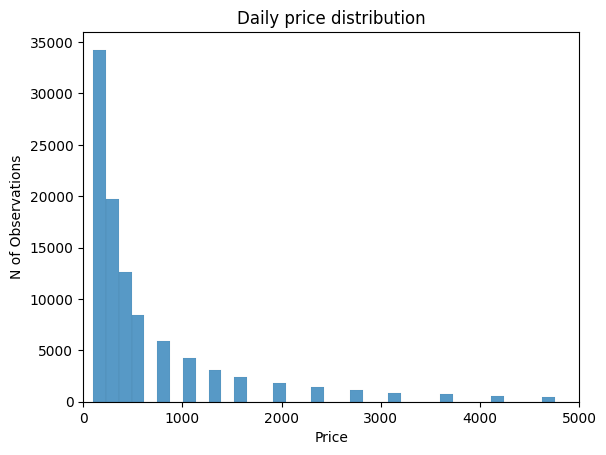

In [12]:
sns.histplot(data=sample_XTP, bins=1500)
plt.title('Daily price distribution')
plt.xlabel('Price')
plt.ylabel('N of Observations')
plt.xlim([0,5000])
plt.show()